## Lattice based models


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

def build_sir(beta, gamma, mu, rho):
    def calc_next_sir_timestep(t, populations):
        populations = populations.reshape((-1,3))
        N = np.sum(populations, axis=1)
        
        lambda_ = beta / N * ((1 - np.sum(rho, axis=0)) * populations[:,1] + np.sum(rho * populations[:,1], axis=1))
        infection_rate = lambda_ * populations[:,0]
        
        recovery_rate = gamma * populations[:,1]
        
        return np.array([
            mu * N - infection_rate - mu * populations[:,0],
            infection_rate - recovery_rate - mu * populations[:,1],
            recovery_rate - mu * populations[:,2]
        ]).T.flatten()
    return calc_next_sir_timestep

def create_rho_matrix(grid_width, rho):
    return np.array([[rho if ((i == j + 1  or i  == j-1) and 
                            math.floor(i / grid_width) == math.floor(j / grid_width)) or 
                           abs(i - j) == grid_width  else 0
                for j in range(grid_width**2)]
                    for i in range(grid_width**2)])


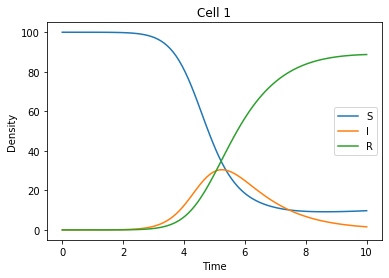

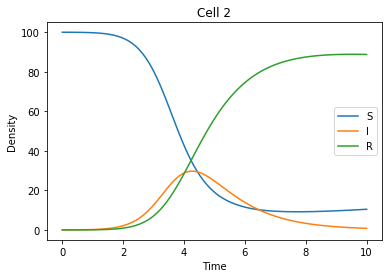

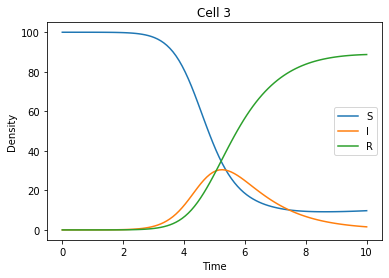

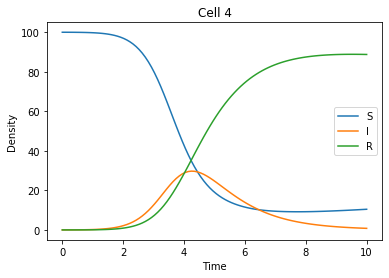

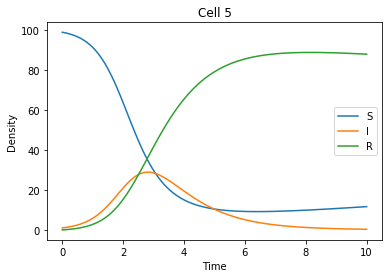

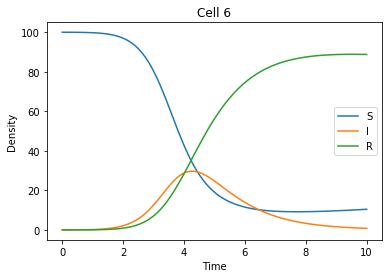

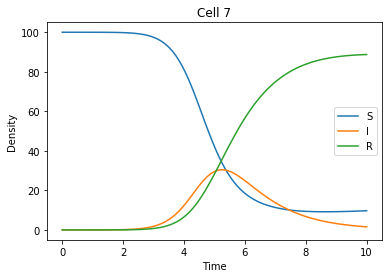

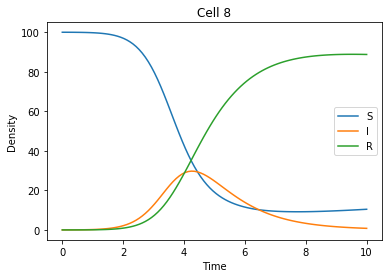

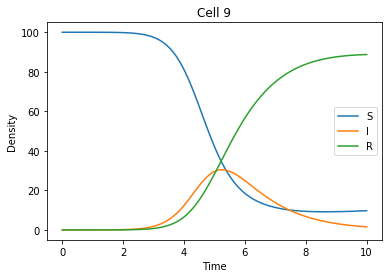

In [51]:
grid_width = 3
beta = 3
gamma = 1
mu = 1/80
initial_condition = np.array([[100, 0, 0], [100, 0, 0], [100, 0, 0],
                              [100, 0, 0], [99, 1, 0], [100, 0, 0],
                              [100, 0, 0], [100, 0, 0], [100, 0, 0]], dtype=np.float64)
v_rho = create_rho_matrix(grid_width, rho=0.01)


time = 10
steps = 100

result = solve_ivp(
    fun=build_sir(beta=beta, gamma=gamma, mu=mu, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = result.y.reshape((-1,3,steps))

for i, pop in enumerate(results):
    plt.figure()
    plt.plot(result.t, pop.T)
    plt.title(f'Cell {i+1}')
    plt.legend(['S', 'I', 'R'])
    plt.xlabel('Time')
    plt.ylabel('Density')

plt.show() 


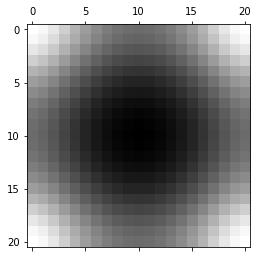

In [67]:
grid_width = 21
v_beta = 3
v_gamma = 1
initial_condition = np.array([[100, 0, 0] for _ in range(grid_width**2)])
initial_condition[math.floor(len(initial_condition) / 2)] = [99, 1, 0]
v_rho = create_rho_matrix(grid_width, rho=0.25)
time = 20
steps = 20

solution = solve_ivp(
    fun=build_sir(beta=v_beta, gamma=v_gamma, mu=1/50, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = solution.y.reshape((-1,3,steps))
plt.matshow(results[:,1,-1].reshape(grid_width, grid_width), cmap='gray')

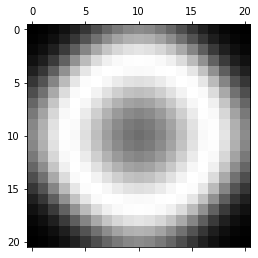

In [71]:

ring = results[:,1,6].reshape(grid_width, grid_width)
plt.matshow(ring, cmap='gray')
